In [2]:
import librosa
from sklearn.preprocessing import StandardScaler
import numpy as np

In [4]:
def preprocess_raw_data(data: list, pad_params: dict, mfcc_parameters: dict):
    """
    Preprocess audio data. Returns MFCC features of each audio sample.

    :param data: List of audio data
    :param fix_length: Fix length to pad each audio sample
    :param mfcc_parameters: Parameters for MFCC extraction
    :return: MFCC data for each audio sample
    """

    # pad data to fix length
    padded_audio = librosa.util.fix_length(
            data, size=pad_params["fix_length"], axis=0, mode=pad_params["mode"]
        )
    padded_audio = padded_audio.astype(np.float32)
    # extract MFCC for each sample
    mfcc = librosa.feature.mfcc(
            y=padded_audio,
            sr=mfcc_parameters["fs"],
            n_mfcc=mfcc_parameters["n_mfcc"],
            n_fft=mfcc_parameters["n_fft"],
            hop_length=int(mfcc_parameters["frame_step"] * mfcc_parameters["fs"]),
            n_mels=mfcc_parameters["n_mels"]
        )
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(mfcc)
    return scaled_features

In [4]:
# Load an audio file
audio_file_path = r'E:\Fennec\data\01_raw\FSD50K.dev_audio\63.wav'
audio_data, sample_rate = librosa.load(audio_file_path, sr=None)
audio_data, sample_rate

(array([0.00143433, 0.0010376 , 0.00097656, ..., 0.00616455, 0.00561523,
        0.00494385], dtype=float32),
 44100)

In [5]:
len(audio_data)

209408

In [17]:
padded_audio = librosa.util.fix_length(
    audio_data, size=100000, axis=0, mode='constant'
    )
mel_spectrogram = librosa.feature.melspectrogram(y=padded_audio, sr=sample_rate, n_mels=128)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

In [18]:
log_mel_spectrogram.shape

(128, 196)

In [14]:
import torch
tn = torch.tensor(log_mel_spectrogram).unsqueeze(0).unsqueeze(0)

In [15]:
tn.shape


torch.Size([1, 1, 128, 410])

In [16]:
padded_audio = librosa.util.fix_length(
            audio_data, size=100000, axis=0, mode= 'constant'
        )

In [17]:
len(padded_audio)

100000

In [29]:
# Define padding and MFCC parameters
pad_params = {
    "fix_length": 100000,  # example length, adjust as needed
    "mode": 'constant'
}

mfcc_parameters = {
    "fs": sample_rate,
    "n_mfcc": 13,
    "n_fft": 2048,
    "frame_step": 0.01,
    "n_mels": 40
}

# Extract features using the preprocess_raw_data function
features = preprocess_raw_data(audio_data, pad_params, mfcc_parameters)
print(features)

[[-3.3776083  -3.3646352  -3.3515706  ... -2.606437   -2.6209984
  -2.6926255 ]
 [ 1.0317105   1.0737464   1.0878003  ...  2.4029808   2.3842876
   2.3186343 ]
 [ 0.17174472  0.12587489  0.0214289  ... -0.2049346  -0.20236774
  -0.12351356]
 ...
 [ 0.20377423  0.21878709  0.24497911 ...  0.05625787  0.08320957
   0.11668272]
 [ 0.18458112  0.18284722  0.15341128 ... -0.02597819 -0.05155779
  -0.06763045]
 [ 0.19849823  0.14566928  0.08351582 ... -0.09045701 -0.0957757
  -0.10576684]]


In [31]:
features

array([[-3.3776083 , -3.3646352 , -3.3515706 , ..., -2.606437  ,
        -2.6209984 , -2.6926255 ],
       [ 1.0317105 ,  1.0737464 ,  1.0878003 , ...,  2.4029808 ,
         2.3842876 ,  2.3186343 ],
       [ 0.17174472,  0.12587489,  0.0214289 , ..., -0.2049346 ,
        -0.20236774, -0.12351356],
       ...,
       [ 0.20377423,  0.21878709,  0.24497911, ...,  0.05625787,
         0.08320957,  0.11668272],
       [ 0.18458112,  0.18284722,  0.15341128, ..., -0.02597819,
        -0.05155779, -0.06763045],
       [ 0.19849823,  0.14566928,  0.08351582, ..., -0.09045701,
        -0.0957757 , -0.10576684]], dtype=float32)

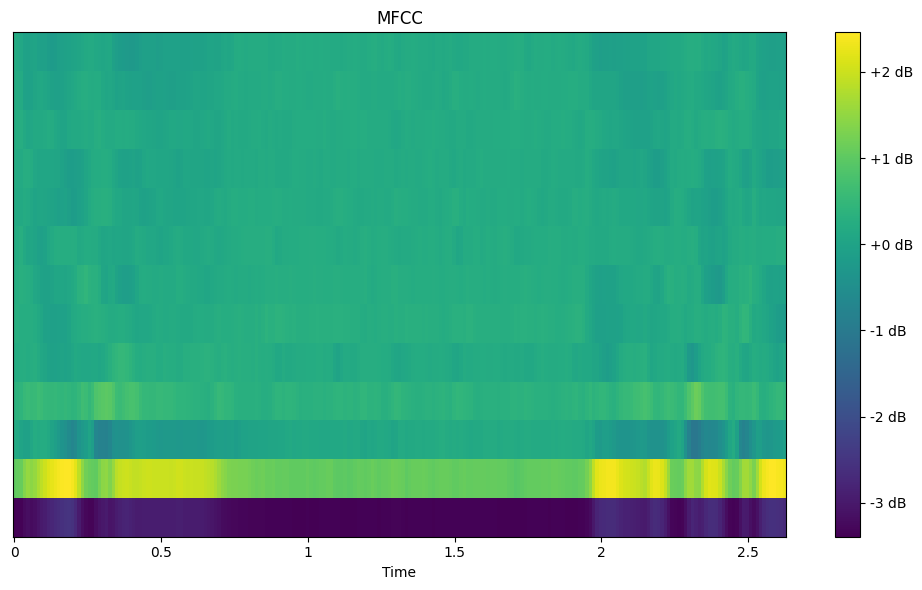

In [32]:
import matplotlib.pyplot as plt
import librosa.display

# Visualize the MFCC features
plt.figure(figsize=(10, 6))
librosa.display.specshow(features, sr=sample_rate, x_axis='time', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.tight_layout()
plt.show()

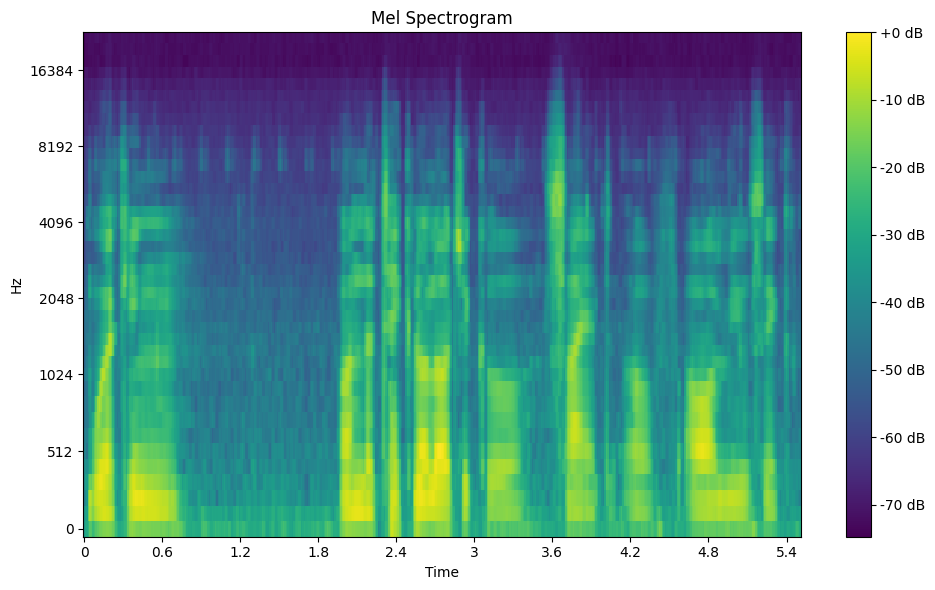

In [33]:
# Compute the mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate, n_fft=mfcc_parameters["n_fft"], hop_length=int(mfcc_parameters["frame_step"] * mfcc_parameters["fs"]), n_mels=mfcc_parameters["n_mels"])

# Convert to log scale (dB)
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

# Visualize the mel spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(log_mel_spectrogram, sr=sample_rate, x_axis='time', y_axis='mel', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

In [34]:
import os
import librosa
import numpy as np

# Path to the folder containing audio files
folder_path = r'E:\Fennec\data\01_raw\FSD50K.dev_audio'

# List to store lengths of audio files
audio_lengths = []

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.wav'):
        file_path = os.path.join(folder_path, filename)
        audio_data, sample_rate = librosa.load(file_path, sr=None)
        audio_lengths.append(len(audio_data))

# Convert to numpy array for easier statistical analysis
audio_lengths = np.array(audio_lengths)

# Calculate statistics
mean_length = np.mean(audio_lengths)
median_length = np.median(audio_lengths)
min_length = np.min(audio_lengths)
max_length = np.max(audio_lengths)
std_length = np.std(audio_lengths)

# Print statistics
print(f"Mean length: {mean_length}")
print(f"Median length: {median_length}")
print(f"Min length: {min_length}")
print(f"Max length: {max_length}")
print(f"Standard deviation: {std_length}")

KeyboardInterrupt: 